In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_pickle('./Desktop/Kaggle_study/Jicbang/jicbang_data')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605376 entries, 0 to 1605375
Data columns (total 38 columns):
apartment_id                          1605376 non-null int64
city                                  1605376 non-null int64
transaction_date                      1605376 non-null int64
year_of_completion                    1605376 non-null int64
exclusive_use_area                    1605376 non-null float64
floor                                 1605376 non-null int64
latitude                              1605376 non-null float64
longitude                             1605376 non-null float64
address_by_law                        1605376 non-null int64
total_parking_capacity_in_site        1605376 non-null float64
total_household_count_in_sites        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
tallest_building_in_sites             1605376 non-null float64
lowest_building_in_sites              1605376 non-null float64
room_id              

# Ligth GBM

- Categorical variable 설정
- train, valid set으로 구분


In [2]:
category_cols = ['apartment_id','city','address_by_law','heat_type','heat_fuel','room_id','front_door_structure','closest_station','ci_gun','ci_gun_eup']
for col in category_cols:
    data[col] = data[col].astype('category')
#data = data.drop('key', axis =1)
train = data.loc[data.transaction_real_price>0]
test = data.loc[data.transaction_real_price==0]
train_target = train.transaction_real_price
train_x = train.drop('transaction_real_price', axis =1)
test_target = test.transaction_real_price
test_x = test.drop('transaction_real_price', axis =1)
train_x, valid_x, train_target,valid_target=train_test_split(train_x, train_target, random_state=99)

In [3]:
import lightgbm as lgb 

fit_params={"early_stopping_rounds":40, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(valid_x,valid_target)],
            'eval_names': ['valid'],
            'verbose': 10,
            
            'feature_name': 'auto', # that's actually the default
           
            'categorical_feature': 'auto' # that's actually the default
            
            
           }

clf = lgb.LGBMRegressor(num_leaves= 100, max_depth=-1, 
                        
                         random_state=99, 
                         silent=True, 
                          metric = 'rmse',
                         objective='regression',
                         n_jobs=-1, 
                         n_estimators=300,
                         colsample_bytree=0.9,
                         subsample_freq= 0,
                         subsample=0.9,
                        reg_alpha=5,
                        num_iterations=1300,
                        reg_lambda=0,
                        max_bin=1000,
                         min_child_samples=40,
                         learning_rate=0.1)
clf.fit(train_x, train_target, **fit_params)


C:\Users\user\PYTHON\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 40 rounds.
[10]	valid's rmse: 1.35431e+08
[20]	valid's rmse: 7.39388e+07
[30]	valid's rmse: 5.41988e+07
[40]	valid's rmse: 4.6377e+07
[50]	valid's rmse: 4.26985e+07
[60]	valid's rmse: 4.04739e+07
[70]	valid's rmse: 3.88865e+07
[80]	valid's rmse: 3.78549e+07
[90]	valid's rmse: 3.71121e+07
[100]	valid's rmse: 3.65866e+07
[110]	valid's rmse: 3.61953e+07
[120]	valid's rmse: 3.58779e+07
[130]	valid's rmse: 3.55593e+07
[140]	valid's rmse: 3.52648e+07
[150]	valid's rmse: 3.50073e+07
[160]	valid's rmse: 3.48414e+07
[170]	valid's rmse: 3.4652e+07
[180]	valid's rmse: 3.44995e+07
[190]	valid's rmse: 3.43882e+07
[200]	valid's rmse: 3.42752e+07
[210]	valid's rmse: 3.41681e+07
[220]	valid's rmse: 3.40948e+07
[230]	valid's rmse: 3.40302e+07
[240]	valid's rmse: 3.39293e+07
[250]	valid's rmse: 3.37996e+07
[260]	valid's rmse: 3.37385e+07
[270]	valid's rmse: 3.36772e+07
[280]	valid's rmse: 3.36103e+07
[290]	valid's rmse: 3.35388e+07
[300]	valid's rmse: 3

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
       importance_type='split', learning_rate=0.1, max_bin=1000,
       max_depth=-1, metric='rmse', min_child_samples=40,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
       n_jobs=-1, num_iterations=1300, num_leaves=100,
       objective='regression', random_state=99, reg_alpha=5, reg_lambda=0,
       silent=True, subsample=0.9, subsample_for_bin=200000,
       subsample_freq=0)

In [64]:
train = data.loc[data.transaction_real_price>0]
test = data.loc[data.transaction_real_price==0]
train_target = train.transaction_real_price
train_x = train.drop('transaction_real_price', axis =1)
test_target = test.transaction_real_price
test_x = test.drop('transaction_real_price', axis =1)


In [65]:
clf.fit(train_x, train_target, **fit_params)


C:\Users\user\PYTHON\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 40 rounds.
[10]	valid's rmse: 1.35448e+08
[20]	valid's rmse: 7.35478e+07
[30]	valid's rmse: 5.33595e+07
[40]	valid's rmse: 4.51629e+07
[50]	valid's rmse: 4.07717e+07
[60]	valid's rmse: 3.83813e+07
[70]	valid's rmse: 3.6722e+07
[80]	valid's rmse: 3.55242e+07
[90]	valid's rmse: 3.4575e+07
[100]	valid's rmse: 3.38557e+07
[110]	valid's rmse: 3.31476e+07
[120]	valid's rmse: 3.26428e+07
[130]	valid's rmse: 3.21797e+07
[140]	valid's rmse: 3.17678e+07
[150]	valid's rmse: 3.1428e+07
[160]	valid's rmse: 3.11552e+07
[170]	valid's rmse: 3.08911e+07
[180]	valid's rmse: 3.05774e+07
[190]	valid's rmse: 3.02857e+07
[200]	valid's rmse: 3.0019e+07
[210]	valid's rmse: 2.97806e+07
[220]	valid's rmse: 2.95457e+07
[230]	valid's rmse: 2.93596e+07
[240]	valid's rmse: 2.91614e+07
[250]	valid's rmse: 2.9006e+07
[260]	valid's rmse: 2.88001e+07
[270]	valid's rmse: 2.86668e+07
[280]	valid's rmse: 2.85072e+07
[290]	valid's rmse: 2.83403e+07
[300]	valid's rmse: 2.81

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
       importance_type='split', learning_rate=0.1, max_bin=400,
       max_depth=-1, metric='rmse', min_child_samples=40,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
       n_jobs=-1, num_iterations=2000, num_leaves=100,
       objective='regression', random_state=99, reg_alpha=5, reg_lambda=0,
       silent=True, subsample=0.9, subsample_for_bin=200000,
       subsample_freq=0)

In [66]:
y_pred = clf.predict(test_x)
y_pred

array([7.75605883e+08, 4.00656459e+08, 1.77522870e+08, ...,
       2.96383859e+08, 4.90122078e+08, 2.24190342e+08])

In [67]:
submission=pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission.csv')
submission['transaction_real_price'] =y_pred
submission.to_csv('./Desktop/Kaggle_study/Jicbang/submission_real_4.csv', index=False)

In [26]:
test_real = test_x
test_real['y_pred']=y_pred

# importance Graph

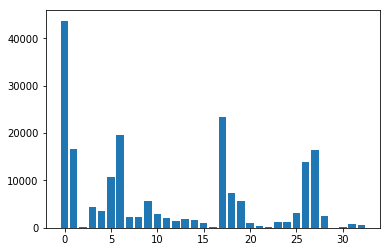

In [72]:
from matplotlib import pyplot

pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()